<a href="https://www.kaggle.com/code/lucasrathgeb/xgboost-cirrhosis-classification?scriptVersionId=159051236" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import uniform, randint
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import MaxNorm
from keras import regularizers

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer, Normalizer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression, f_regression, mutual_info_regression

from sklearn.preprocessing import OrdinalEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

In [4]:
train_data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [5]:
train_data.shape

(7905, 20)

In [6]:
print(train_data.isnull().sum())

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


In [7]:
train_data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
# print(train_data.value_counts())
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [9]:
categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Status"]
for f in categorical_features:
    print(train_data[f].value_counts())

Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
Sex
F    7336
M     569
Name: count, dtype: int64
Ascites
N    7525
Y     380
Name: count, dtype: int64
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64
Spiders
N    5966
Y    1939
Name: count, dtype: int64
Edema
N    7161
S     399
Y     345
Name: count, dtype: int64
Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


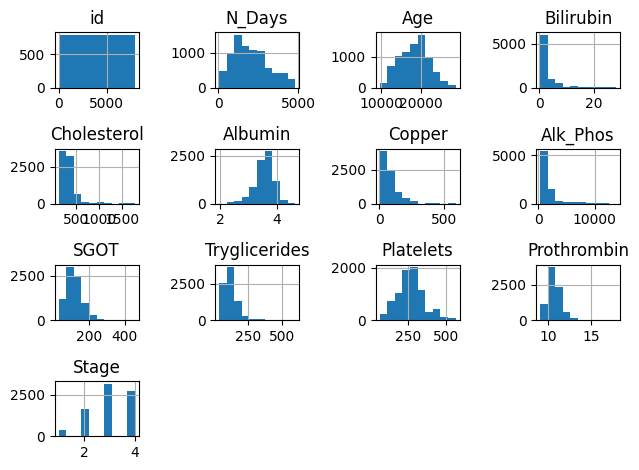

In [10]:
train_data.hist()
plt.tight_layout()
plt.show()

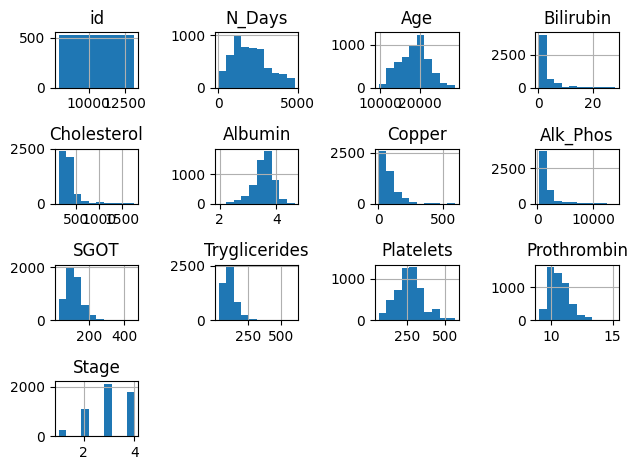

In [11]:
test_data.hist()
plt.tight_layout()
plt.show()

Some observations from initially investigating the data

* There are 19 features in total
* No null/missing values therefore imputation won't be needed
* Age seems to be in days. 
    *  Could convert this to years to reduce variability.
* Bilirubin, Cholesterol, Copper and Alk_Phos all seem to have outliers/are long tailed
    * Can experiment with removing/handling outlier techniques
*  Categorical features: "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Status"
    * Binary categorical: "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders"
    * Ternary categorical: "Edema"
* Some of the categorical features are not evenly distributed
    * Sex is largely female (92.8%)
    * Ascites is largely "N" (95.2%)
    * Edems is largely "N" (90.6%)



In [12]:
# copper_log_test = np.log1p(train_data["Copper"])

# copper_log_test.hist()
# plt.show()

In [13]:
def convert_binary_cats(data, features):
    for feature in features:
        temp_df = pd.get_dummies(data[feature]).astype('float32')
    #     print(genders)
        data = data.drop(feature, axis=1)
        data[feature] = temp_df[temp_df.columns.values[0]]
        
    return data
    

In [14]:
X_train = train_data.copy()

bin_cats = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders"]

X_train = convert_binary_cats(X_train, bin_cats)
print(X_train)

        id  N_Days    Age Edema  Bilirubin  Cholesterol  Albumin  Copper  \
0        0     999  21532     N        2.3        316.0     3.35   172.0   
1        1    2574  19237     N        0.9        364.0     3.54    63.0   
2        2    3428  13727     Y        3.3        299.0     3.55   131.0   
3        3    2576  18460     N        0.6        256.0     3.50    58.0   
4        4     788  16658     N        1.1        346.0     3.65    63.0   
...    ...     ...    ...   ...        ...          ...      ...     ...   
7900  7900    1166  16839     N        0.8        309.0     3.56    38.0   
7901  7901    1492  17031     N        0.9        260.0     3.43    62.0   
7902  7902    1576  25873     S        2.0        225.0     3.19    51.0   
7903  7903    3584  22960     N        0.7        248.0     2.75    32.0   
7904  7904    1978  19237     N        0.7        256.0     3.23    22.0   

      Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  Stage Status  \
0       

In [15]:
y_train = pd.get_dummies(train_data["Status"]).astype('float32')
print(y_train)

        C   CL    D
0     0.0  0.0  1.0
1     1.0  0.0  0.0
2     0.0  0.0  1.0
3     1.0  0.0  0.0
4     1.0  0.0  0.0
...   ...  ...  ...
7900  1.0  0.0  0.0
7901  1.0  0.0  0.0
7902  0.0  0.0  1.0
7903  0.0  0.0  1.0
7904  1.0  0.0  0.0

[7905 rows x 3 columns]


In [16]:
edema_cats = pd.get_dummies(X_train["Edema"]).astype('float32')
X_train = X_train.drop("Edema", axis=1)
X_train = pd.concat([X_train, edema_cats], axis=1)
X_train = X_train.drop(["id","Status"], axis=1)
print(X_train)

      N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        999  21532        2.3        316.0     3.35   172.0    1601.0   
1       2574  19237        0.9        364.0     3.54    63.0    1440.0   
2       3428  13727        3.3        299.0     3.55   131.0    1029.0   
3       2576  18460        0.6        256.0     3.50    58.0    1653.0   
4        788  16658        1.1        346.0     3.65    63.0    1181.0   
...      ...    ...        ...          ...      ...     ...       ...   
7900    1166  16839        0.8        309.0     3.56    38.0    1629.0   
7901    1492  17031        0.9        260.0     3.43    62.0    1440.0   
7902    1576  25873        2.0        225.0     3.19    51.0     933.0   
7903    3584  22960        0.7        248.0     2.75    32.0    1003.0   
7904    1978  19237        0.7        256.0     3.23    22.0     645.0   

        SGOT  Tryglicerides  Platelets  Prothrombin  Stage  Drug  Sex  \
0     179.80           63.0      394.0

In [17]:
#ordinal encode y_train
y_train = pd.DataFrame(train_data["Status"])
# y_train.reshape(-1, 1)
print(y_train)
encoder = OrdinalEncoder()
y_train = encoder.fit_transform(y_train)
print(y_train)

     Status
0         D
1         C
2         D
3         C
4         C
...     ...
7900      C
7901      C
7902      D
7903      D
7904      C

[7905 rows x 1 columns]
[[2.]
 [0.]
 [2.]
 ...
 [2.]
 [2.]
 [0.]]


In [18]:
log_alk_phos = np.log1p(X_train["Alk_Phos"])
log_copper = np.log1p(X_train["Copper"])
X_train = X_train.drop(["Alk_Phos","Copper"], axis=1)
X_train["Alk_Phos"] = log_alk_phos
X_train["Copper"] = log_copper

In [19]:
severe_symptoms = X_train["Ascites"] + X_train["Hepatomegaly"] + X_train["Spiders"] + X_train["S"]*0.5 + X_train["Y"]
print(severe_symptoms)
# X_train["Severe Symptom Count"] = severe_symptoms
# symp_to_drop = ["Ascites","Hepatomegaly", "Spiders", "N", "S", "Y"]
# X_train = X_train.drop(symp_to_drop, axis=1)

symp_to_drop = ["S", "Y"]
X_train = X_train.drop(symp_to_drop, axis=1)

print(X_train)

0       3.0
1       3.0
2       2.0
3       3.0
4       2.0
       ... 
7900    3.0
7901    2.0
7902    2.5
7903    2.0
7904    3.0
Length: 7905, dtype: float32
      N_Days    Age  Bilirubin  Cholesterol  Albumin    SGOT  Tryglicerides  \
0        999  21532        2.3        316.0     3.35  179.80           63.0   
1       2574  19237        0.9        364.0     3.54  134.85           88.0   
2       3428  13727        3.3        299.0     3.55  119.35           50.0   
3       2576  18460        0.6        256.0     3.50   71.30           96.0   
4        788  16658        1.1        346.0     3.65  125.55           96.0   
...      ...    ...        ...          ...      ...     ...            ...   
7900    1166  16839        0.8        309.0     3.56   79.05          224.0   
7901    1492  17031        0.9        260.0     3.43  142.00           78.0   
7902    1576  25873        2.0        225.0     3.19   69.75           62.0   
7903    3584  22960        0.7        248.0     2

In [20]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [21]:
# xgb_tuned = XGBClassifier()
# params = {
#     "learning_rate": [0.1,0.3], # default 0.1 
#     "max_depth": [3,5], # default 3
#     "n_estimators": [100,350], # default 100
#     "subsample": [0.2,0.5,0.8],
#     "colsample_bytree":[0.2,0.5,0.7]
# }
# xgb_tuned_testing = GridSearchCV(xgb_tuned, params, cv=3, n_jobs=-1, verbose=2).fit(np.array(X_train), np.array(y_train))

# xgb_tuned_testing.best_params_

'colsample_bytree': 0.2,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 350,
 'subsample': 0.5

In [22]:
from xgboost import XGBClassifier

model = XGBClassifier(objective='multi:softprob',
                      colsample_bytree= 0.2,
                      learning_rate= 0.1,
                      max_depth= 5,
                      n_estimators= 350,
                      subsample= 0.5)

model.fit(np.array(X_train), 
             np.array(y_train))

xgb_preds = pd.DataFrame(model.predict_proba(X_train))
print(xgb_preds)

             0         1         2
0     0.043212  0.001907  0.954881
1     0.852608  0.002465  0.144927
2     0.025675  0.001297  0.973028
3     0.943914  0.001756  0.054330
4     0.706350  0.080766  0.212884
...        ...       ...       ...
7900  0.951985  0.010058  0.037957
7901  0.786242  0.012982  0.200777
7902  0.128915  0.001053  0.870032
7903  0.335966  0.001032  0.663002
7904  0.971355  0.000413  0.028232

[7905 rows x 3 columns]


In [23]:
#preprocess test data
X_test = test_data.copy()

X_test = convert_binary_cats(X_test, bin_cats)
# print(X_test)

edema_cats = pd.get_dummies(X_test["Edema"]).astype('float32')
X_test = X_test.drop("Edema", axis=1)
X_test = pd.concat([X_test, edema_cats], axis=1)
X_test = X_test.drop(["id"], axis=1)

log_alk_phos = np.log1p(X_test["Alk_Phos"])
log_copper = np.log1p(X_test["Copper"])
X_test = X_test.drop(["Alk_Phos","Copper"], axis=1)
X_test["Alk_Phos"] = log_alk_phos
X_test["Copper"] = log_copper


severe_symptoms = X_test["Ascites"] + X_test["Hepatomegaly"] + X_test["Spiders"] + X_test["S"]*0.5 + X_test["Y"]
print(severe_symptoms)
# X_test["Severe Symptom Count"] = severe_symptoms
# symp_to_drop = ["Ascites","Hepatomegaly", "Spiders", "N", "S", "Y"]
symp_to_drop = ["S", "Y"]
X_test = X_test.drop(symp_to_drop, axis=1)
print(X_test)

0       2.0
1       3.0
2       3.0
3       3.0
4       2.0
       ... 
5266    3.0
5267    3.0
5268    2.0
5269    3.0
5270    3.0
Length: 5271, dtype: float32
      N_Days    Age  Bilirubin  Cholesterol  Albumin    SGOT  Tryglicerides  \
0       3839  19724        1.2        546.0     3.37  151.90           90.0   
1       2468  14975        1.1        660.0     4.22  151.90          155.0   
2         51  13149        2.0        151.0     2.96   69.75          101.0   
3       2330  20510        0.6        293.0     3.85  125.55           56.0   
4       1615  21904        1.4        277.0     2.97  125.00          126.0   
...      ...    ...        ...          ...      ...     ...            ...   
5266    2870  12279        1.3        302.0     3.43  145.00           44.0   
5267    1770  24803        0.5        219.0     4.09   79.05           94.0   
5268    3707  16990        0.8        315.0     4.09  170.50           70.0   
5269    1216  11773        0.7        329.0     3

In [24]:
preds = pd.DataFrame(model.predict_proba(X_test))
preds.rename(columns={0: 'Status_C', 1: 'Status_CL', 2: 'Status_D'}, inplace=True)
preds = np.clip(preds, 0.0002, 0.59)
print(preds)

      Status_C  Status_CL  Status_D
0     0.253472   0.010552  0.590000
1     0.453384   0.258189  0.288427
2     0.040027   0.008930  0.590000
3     0.590000   0.002395  0.017325
4     0.590000   0.065319  0.092176
...        ...        ...       ...
5266  0.590000   0.090086  0.052965
5267  0.590000   0.001320  0.006175
5268  0.590000   0.005909  0.035999
5269  0.590000   0.004389  0.006988
5270  0.568527   0.011693  0.419780

[5271 rows x 3 columns]


In [25]:

submission = pd.concat([test_data["id"],preds],axis=1)
print(submission)
submission.to_csv('submission.csv',index=False)
submission.describe()

         id  Status_C  Status_CL  Status_D
0      7905  0.253472   0.010552  0.590000
1      7906  0.453384   0.258189  0.288427
2      7907  0.040027   0.008930  0.590000
3      7908  0.590000   0.002395  0.017325
4      7909  0.590000   0.065319  0.092176
...     ...       ...        ...       ...
5266  13171  0.590000   0.090086  0.052965
5267  13172  0.590000   0.001320  0.006175
5268  13173  0.590000   0.005909  0.035999
5269  13174  0.590000   0.004389  0.006988
5270  13175  0.568527   0.011693  0.419780

[5271 rows x 4 columns]


,id,Status_C,Status_CL,Status_D
count,5271.000000,5271.000000,5271.000000,5271.000000
mean,10540.000000,0.439895,0.025639,0.264906
std,1521.750965,0.222548,0.069535,0.242586
min,7905.000000,0.000293,0.000200,0.000413
25%,9222.500000,0.258446,0.001874,0.035250
50%,10540.000000,0.590000,0.005598,0.156097
75%,11857.500000,0.590000,0.018578,0.590000
max,13175.000000,0.590000,0.590000,0.590000
